In [1]:
import pandas as pd

df = pd.read_csv("../../data/processed/model_df_vote_classification_normalized.csv")

In [2]:
class_counts = df["voted_classified"].value_counts()
print("Rodzaj danej odpowiedzi i jej ilość:")
print(class_counts)

class_percent = class_counts / len(df) * 100
print("\nRodzaj danej odpowiedzi i jej ilość procentowa:")
print(class_percent.round(2))

Rodzaj danej odpowiedzi i jej ilość:
voted_classified
Correct Answers      4344
Incorrect Answers    1907
Best Answer           149
Name: count, dtype: int64

Rodzaj danej odpowiedzi i jej ilość procentowa:
voted_classified
Correct Answers      67.88
Incorrect Answers    29.80
Best Answer           2.33
Name: count, dtype: float64


In [3]:
df["is_correct"] = df["voted_classified"].isin(["Correct Answers", "Best Answer"])

accuracy_by_model = df.groupby("model")["is_correct"].mean()*100
hallucination_rate = 100 - accuracy_by_model

print("Precyzja danego modelu procentowo:")
print(accuracy_by_model.round(2))
print("\nIlość halucynacji danego modelu procentowo:")
print(hallucination_rate.round(2))

Precyzja danego modelu procentowo:
model
deepseek-v2:16b    65.94
gemma3:12b         67.19
llama3.1:8b        69.56
mistral:7b         78.12
Name: is_correct, dtype: float64

Ilość halucynacji danego modelu procentowo:
model
deepseek-v2:16b    34.06
gemma3:12b         32.81
llama3.1:8b        30.44
mistral:7b         21.88
Name: is_correct, dtype: float64


In [4]:
acc_by_lorem = (df.groupby("lorem_length")["is_correct"].mean() * 100).round(2)
print("Procentowa ilość poprawnych odpowiedzi w zależności od ilości znaków lorem ipsum:")
print(acc_by_lorem)

Procentowa ilość poprawnych odpowiedzi w zależności od ilości znaków lorem ipsum:
lorem_length
0       72.69
100     71.25
300     69.00
1000    67.88
Name: is_correct, dtype: float64


In [5]:
acc_by_prompt = (df.groupby("prompt_type")["is_correct"].mean() * 100).round(2)
print("Procentowa ilość poprawnych odpowiedzi w zależności od podania danej odpowiedzi:")
print(acc_by_prompt)

Procentowa ilość poprawnych odpowiedzi w zależności od podania danej odpowiedzi:
prompt_type
best_answer         88.06
correct_answer      93.88
incorrect_answer    43.69
no_answer           55.19
Name: is_correct, dtype: float64


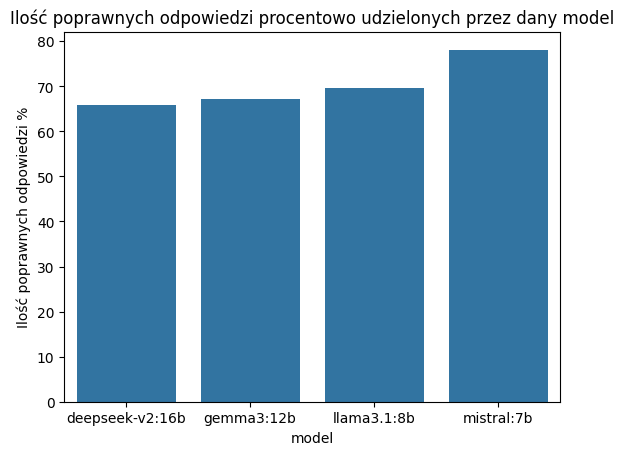

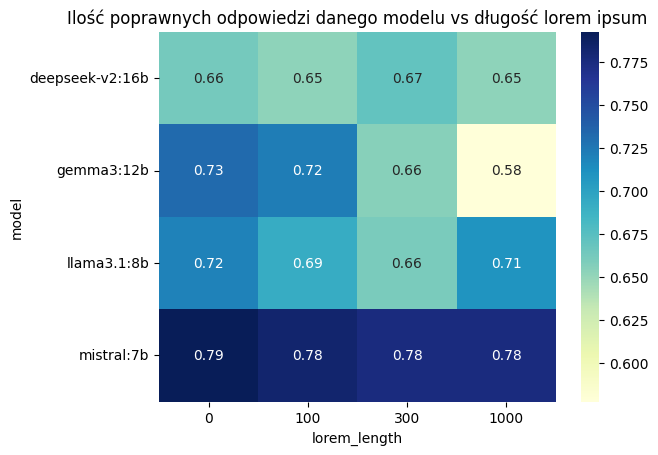

In [6]:
import seaborn as sns, matplotlib.pyplot as plt

sns.barplot(x=accuracy_by_model.index, y=accuracy_by_model.values)
plt.title("Ilość poprawnych odpowiedzi procentowo udzielonych przez dany model")
plt.ylabel("Ilość poprawnych odpowiedzi %")
plt.show()

heat_data = df.pivot_table(index="model", columns="lorem_length",
                           values="is_correct", aggfunc="mean")
sns.heatmap(heat_data, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Ilość poprawnych odpowiedzi danego modelu vs długość lorem ipsum")
plt.show()

In [7]:
import numpy as np

pivot_acc_prompt = df.pivot_table(index="model",
                           columns="prompt_type",
                           values="is_correct",
                           aggfunc="mean")
print(pivot_acc_prompt.round(3))

prompt_type      best_answer  correct_answer  incorrect_answer  no_answer
model                                                                    
deepseek-v2:16b        0.870           0.905             0.292      0.570
gemma3:12b             0.898           0.952             0.385      0.452
llama3.1:8b            0.818           0.942             0.507      0.515
mistral:7b             0.938           0.955             0.562      0.670


C:\Users\giantuss\AppData\Local\Temp\ipykernel_23768\3320628123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acc_by_prompt.index, y=acc_by_prompt.values,


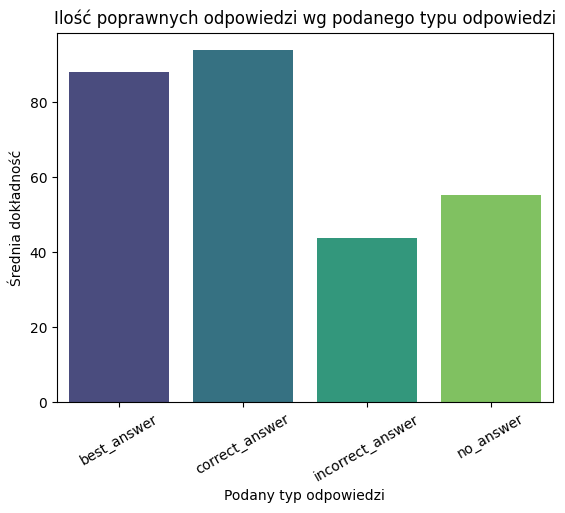

In [8]:
import seaborn as sns, matplotlib.pyplot as plt

sns.barplot(x=acc_by_prompt.index, y=acc_by_prompt.values,
            palette="viridis")
plt.title("Ilość poprawnych odpowiedzi wg podanego typu odpowiedzi")
plt.ylabel("Średnia dokładność")
plt.xlabel("Podany typ odpowiedzi")
plt.xticks(rotation=30)
plt.show()

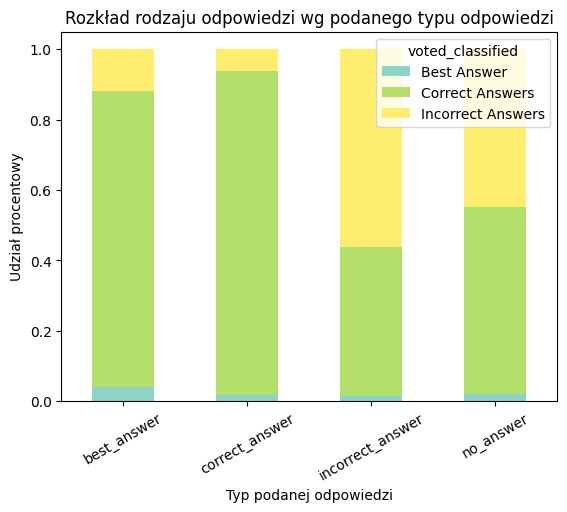

In [9]:
stack = pd.crosstab(df["prompt_type"], df["voted_classified"])
stack_norm = stack.div(stack.sum(axis=1), axis=0)

stack_norm.plot(kind="bar", stacked=True, colormap="Set3")
plt.title("Rozkład rodzaju odpowiedzi wg podanego typu odpowiedzi")
plt.ylabel("Udział procentowy")
plt.xlabel("Typ podanej odpowiedzi")
plt.xticks(rotation=30)
plt.show()

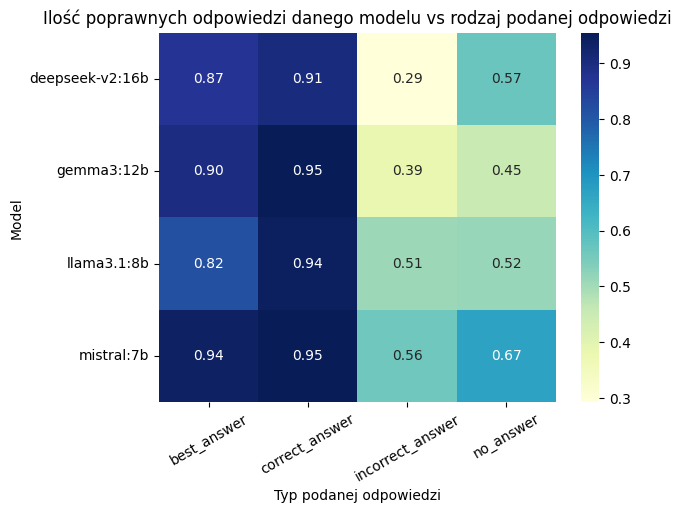

In [10]:
sns.heatmap(pivot_acc_prompt, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Ilość poprawnych odpowiedzi danego modelu vs rodzaj podanej odpowiedzi")
plt.ylabel("Model")
plt.xlabel("Typ podanej odpowiedzi")
plt.xticks(rotation=30)
plt.show()

In [11]:
import numpy as np

pivot_acc_lorem = df.pivot_table(index="model",
                           columns="lorem_length",
                           values="is_correct",
                           aggfunc="mean")
print(pivot_acc_lorem.round(3))

lorem_length      0      100    300    1000
model                                      
deepseek-v2:16b  0.662  0.652  0.670  0.652
gemma3:12b       0.732  0.722  0.655  0.578
llama3.1:8b      0.720  0.692  0.660  0.710
mistral:7b       0.792  0.782  0.775  0.775
